In [39]:
import os

import pandas as pd
import folium
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

In [4]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [5]:
def runQuery(sql: str):
    """
    Executes a SQL Query
    """
    result = engine.connect().execute(text(sql))
    return pd.DataFrame(result.fetchall(), columns=result.keys())

In [6]:
query = """
SELECT * FROM station;
"""
runQuery(query)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
query = """
SELECT * FROM measurement;
"""
runQuery(query)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


## Max Date Measurement

In [23]:
query_last_date_measurement = """
    SELECT MAX(date) FROM measurement
"""
runQuery(query_last_date_measurement)

,MAX(date)
0,2017-08-23


In [36]:
query_prec_last12 = f"""
    select date, prcp from 
    measurement
    where date >= date(
        (
            {
                query_last_date_measurement
            }
        )
        ,
        '-12 month'
    )
"""
prec_last12M = runQuery(query_prec_last12)
prec_last12M.index = prec_last12M.date
prec_last12M.index = pd.to_datetime(prec_last12M.index)
prec_last12M.sort_index(inplace=True)
prec_last12M

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


Text(0.5, 1.0, 'Precipitation las 12 Months')

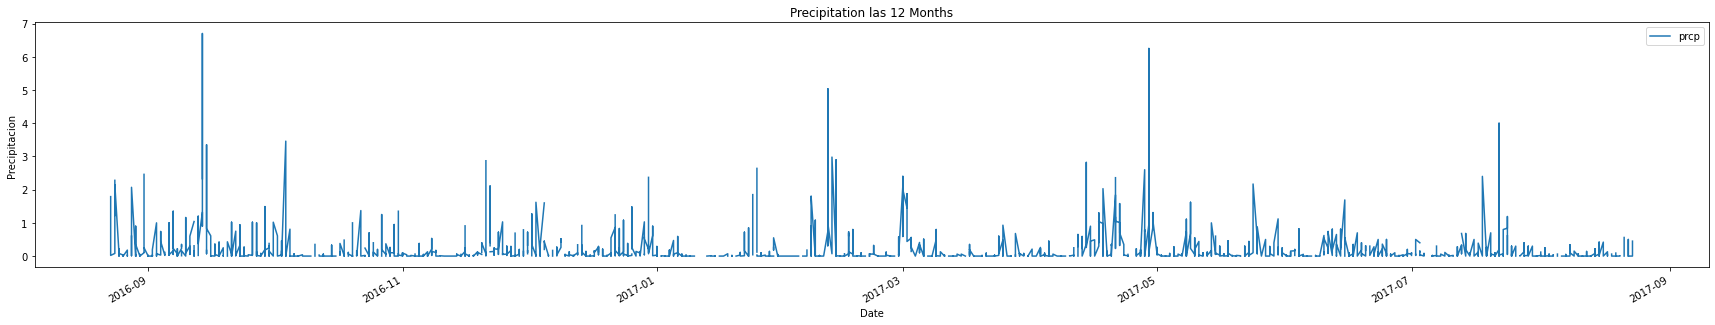

In [37]:
ax = prec_last12M[['prcp']].plot(figsize=(30,5))
ax.set_xlabel("Date")
ax.set_ylabel("Precipitacion")
ax.set_title("Precipitation las 12 Months")

## Mapa de Estaciones

In [42]:
map = folium.Map(location=[21.311389, -157.796389], zoom_start = 7)

map

In [43]:
folium.Marker([21.311389, -157.796389] ).add_to(map)
map

In [45]:
folium.Marker([21.311389, -157.796389], popup='Este es mi marcador' ).add_to(map)
map

In [54]:
def mapa_markers(dataframe_,lat_,long_,popup_,lat_ini,long_ini,zoom_=7):

  map = folium.Map(location=[lat_ini, long_ini], zoom_start=zoom_)

  for i in range(0, dataframe_.shape[0]):
    folium.Marker([dataframe_.loc[i,lat_], 
                   dataframe_.loc[i,long_]],
                  popup=dataframe_.loc[i,popup_]).add_to(map)
                  
  return map

In [48]:
query = """
SELECT * FROM station;
"""
Stations = runQuery(query)
Stations

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [55]:
mapa_markers(dataframe_=Stations,
             lat_='latitude',
             long_='longitude',
             popup_='name',
             lat_ini=21.311389,
             long_ini=-157.796389,
             zoom_=7)